# Diszkrét illeszkedésvizsgálat
(discrate goodness of fit test)

In [126]:
import numpy as np
from scipy.stats import chi2, binom
import matplotlib.pyplot as plt
from IPython.display import display, Math

In [127]:
amounts_of_scrap = [0, 1, 2, 3, 4] # osztályok
r = len(amounts_of_scrap) # osztályok száma
amount_of_scrap_frequencies = [80, 113, 77, 27, 3] # gyakoriságok
n = sum(amount_of_scrap_frequencies) # gyakoriságok összege
n

300

In [128]:
bin_n = 4 # a binomiális eloszlás n paramétere

p_known = False 

bin_p = 0.25 # a binomiális eloszlás p paramétere
if (not p_known):
    # ml becslés p-re
    bin_p = (sum([amounts_of_scrap[i] * amount_of_scrap_frequencies[i] for i in range(r)]) / n) / bin_n

bin_p

0.3

In [129]:
probabilities = [binom.pmf(i, bin_n, bin_p) for i in range(0, r)] # valószínűségek
probabilities

[0.24010000000000004, 0.41159999999999997, 0.26460000000000006, 0.0756, 0.0081]

In [130]:
theoretical_frequencies = [probability * n for probability in probabilities] # elméleti gyakoriságok
theoretical_frequencies

[72.03000000000002,
 123.47999999999999,
 79.38000000000002,
 22.68,
 2.4299999999999997]

A próbastatisztika értéke:

In [131]:
eq = ''
test_statistic_result = 0
for i in range(r):
    eq += rf'\frac{{ \left( {round(amount_of_scrap_frequencies[i], 4)} - {round(theoretical_frequencies[i], 4)} \right)^2 }}{{{round(theoretical_frequencies[i], 4)}}} + '
    test_statistic_result += (amount_of_scrap_frequencies[i] - theoretical_frequencies[i])**2 / theoretical_frequencies[i]
    
eq = eq.strip(' +')
eq += f"={test_statistic_result}"

display(Math(r'' + eq))

<IPython.core.display.Math object>

Szignifikanciaszint:

In [132]:
alpha = 0.05

A próbastatisztika $\chi^2$ eloszlást követ, melynek paramétere:

In [133]:
if (p_known):
    chi_distribution_param = r-1
else:
    chi_distribution_param = r-2
chi_distribution_param

3

A kritikus tartomány kezdete:

In [134]:
critical_start = chi2.ppf(1 - alpha, df=chi_distribution_param)
critical_start

7.814727903251179

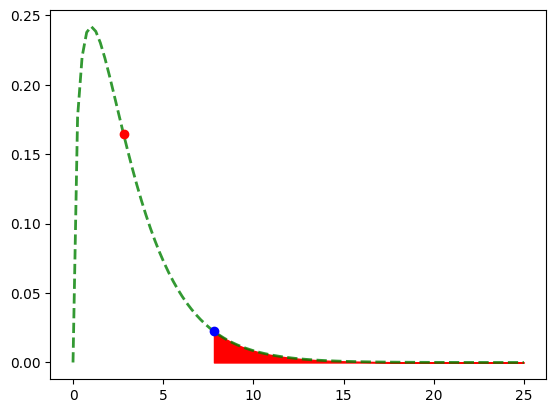

In [135]:
fig, ax = plt.subplots(1, 1)

distribution = chi2(df=chi_distribution_param)

x = np.linspace(0, 25, 100)
x2 = np.linspace(critical_start, 25, 100)
ax.plot(x, chi2.pdf(x, df=chi_distribution_param), 'g--', lw=2, alpha=0.8, label='chi2 pdf')
ax.plot(critical_start, distribution.pdf(critical_start), 'bo')
ax.plot(test_statistic_result, distribution.pdf(test_statistic_result), 'ro')
ax.fill_between(x2, y1=0, y2=chi2.pdf(x2, df=chi_distribution_param), color='r')

In [136]:
if (test_statistic_result < critical_start):
    display('Mivel a próbastatisztika értéke az konfidenciaintervallumba esik ezért elfogadjuk a nullhipotézist.')
else:
    display('Mivel a próbastatisztika értéke a kritikus tartományba esik a nullhipotézist elutasítjuk.')

'Mivel a próbastatisztika értéke az konfidenciaintervallumba esik ezért elfogadjuk a nullhipotézist.'